(1797, 64)


<Figure size 640x480 with 0 Axes>

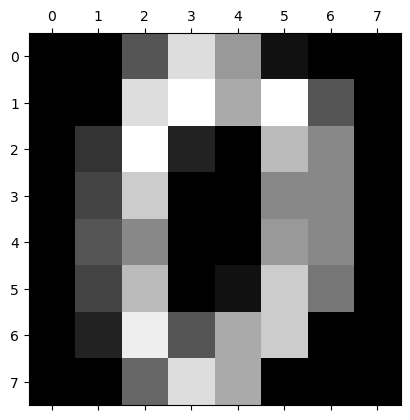

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
# from PIL import Image

mnist = load_digits()
print(mnist.data.shape)

# img = Image.fromarray(mnist.data[0,:].reshape(8,8).astype(np.uint8), mode='L')
# img.show()

plt.gray()
plt.matshow(mnist.images[0])

data = mnist.data

In [2]:
# Check for NAN
nans = np.array([np.isnan(data[i, :]).sum() for i in range(data.shape[0])])
print(nans)
print('Total nans: {0}'.format(nans.sum()))

[0 0 0 ... 0 0 0]
Total nans: 0


In [3]:
print(mnist.target.shape)
print(mnist.target.ndim)
print(data.ndim)

(1797,)
1
2


Execution time: 4.99 milliseconds.

Searching for duplicates in the train set...
Duplicates not found.

Searching for duplicates in the test set...
Duplicates not found.

Success! Train and test set are independent form each other.



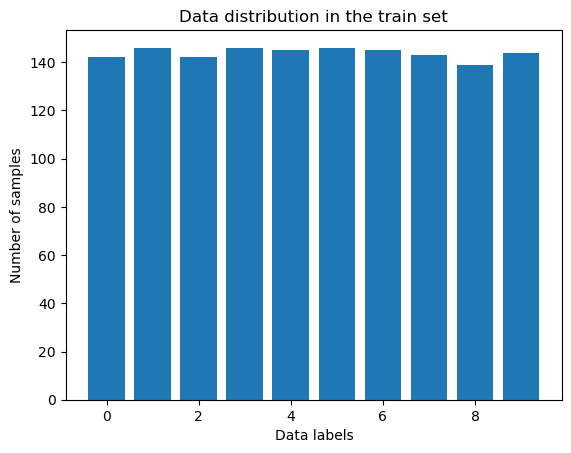

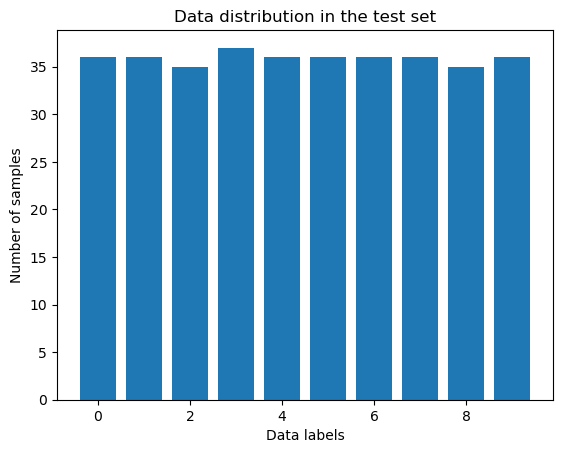

Train size: (1438, 65)
Test size: (359, 65)



<Figure size 640x480 with 0 Axes>

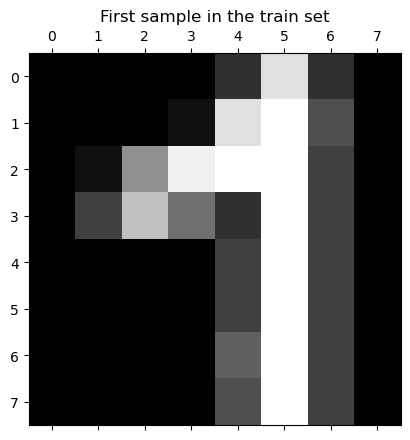

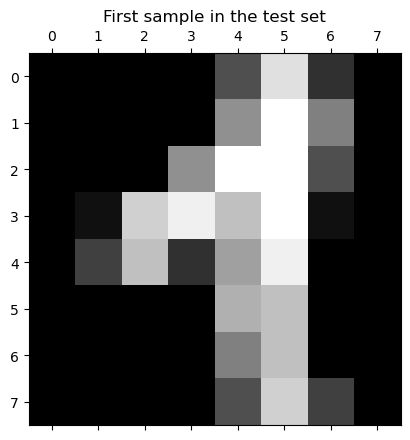

In [3]:
# Splits the dataset into train and test and validates the data
import ml_utils
import time

start = time.time()
trainset, testset = ml_utils.split_train_test(data, mnist.target)
exec_time = (time.time() - start) * 1000
print("Execution time: {:.2f} milliseconds.\n".format(exec_time))

# Eliminate duplicates
print("Searching for duplicates in the train set...")
trainset, repeate_count = ml_utils.remove_duplicates(trainset)

if repeate_count > 0:
    print("Found {0} repeated samples. Duplicates were removed from dataset.".format(
        repeate_count))
else:
    print("Duplicates not found.")
print()

print("Searching for duplicates in the test set...")
testset, repeate_count = ml_utils.remove_duplicates(testset)

if repeate_count > 0:
    print("Found {0} repeated samples. Duplicates were removed from dataset.".format(
        repeate_count))
else:
    print("Duplicates not found.")
print()

# Check if test set and train set are disjoint
intersec = ml_utils.check_intersection(testset, trainset)

if not intersec:
    print("Success! Train and test set are independent form each other.\n")
else:
    print("Issue found: some samples occur on both sets.\n")
    
    # Remove intersection from the train set (since it has more data)
    for sample, count in intersec:
        print("Test sample: {0}\nOccurencies on train set: {1}.\n".format(
            sample, count))
        
        trainset = trainset[np.any(trainset != sample, axis=1)]

# Show distribution of samples per class in the train set
ml_utils.plot_data_distribution(
    trainset[:, -1], "Data distribution in the train set")

# Show distribution of samples per class in the test set
ml_utils.plot_data_distribution(
    testset[:, -1], "Data distribution in the test set")

# Shows the first sample of the train dataset to make sure it is shuffled
plt.gray()
plt.matshow(trainset[0, :-1].reshape(8,8))
plt.title("First sample in the train set")

# Shows the first sample of the test dataset to make sure it is shuffled
plt.gray()
plt.matshow(testset[0, :-1].reshape(8,8))
plt.title("First sample in the test set") 

print("Train size: {0}".format(trainset.shape))
print("Test size: {0}\n".format(testset.shape))


One hot encoding
0: [1 0 0 0 0 0 0 0 0 0]
1: [0 1 0 0 0 0 0 0 0 0]
2: [0 0 1 0 0 0 0 0 0 0]
3: [0 0 0 1 0 0 0 0 0 0]
4: [0 0 0 0 1 0 0 0 0 0]
5: [0 0 0 0 0 1 0 0 0 0]
6: [0 0 0 0 0 0 1 0 0 0]
7: [0 0 0 0 0 0 0 1 0 0]
8: [0 0 0 0 0 0 0 0 1 0]
9: [0 0 0 0 0 0 0 0 0 1]

[ 0.  0.  0.  0.  3. 14.  3.  0.  0.  0.  0.  1. 14. 16.  5.  0.  0.  1.
  9. 15. 16. 16.  4.  0.  0.  4. 12.  7.  3. 16.  4.  0.  0.  0.  0.  0.
  4. 16.  4.  0.  0.  0.  0.  0.  4. 16.  4.  0.  0.  0.  0.  0.  6. 16.
  4.  0.  0.  0.  0.  0.  5. 16.  4.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.]

Sample:


<Figure size 640x480 with 0 Axes>

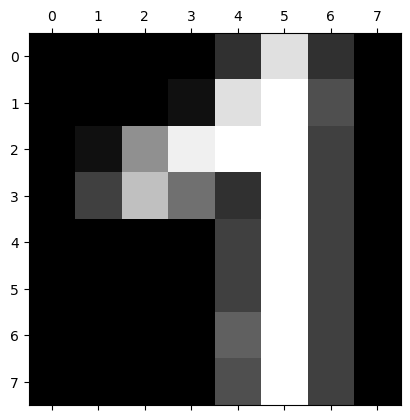

In [4]:
# Create one hot encoding
import nn_layers as nnl

print("One hot encoding")
one_hot_encoder = nnl.OneHotEncoder(np.arange(10))
one_hot_encoder.print_hot_encoding()

train_targets = one_hot_encoder.batch_encode(trainset[:, -1:].flatten())                                 
trainset = np.hstack((trainset[:, :-1], train_targets))

print()
print(trainset[0, :])
print("\nSample:")
plt.gray()
plt.matshow(trainset[0, :-one_hot_encoder.n_classes].reshape(8,8))

ValueError: Since axis is `None`, must provide window_shape for all dimensions of `x`; got 4 window_shape elements and `x.ndim` is 2.

<Figure size 640x480 with 0 Axes>

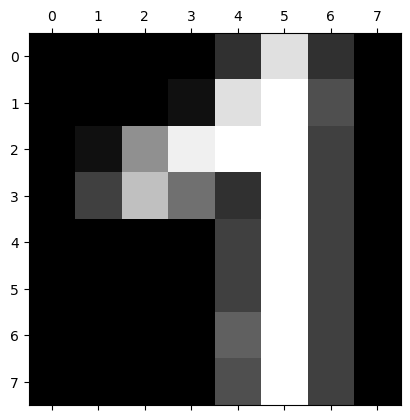

In [7]:
# Chat GPT
def convolution2D(input_matrix, kernel): 
    input_height, input_width = input_matrix.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the output matrix size
    output_height = input_height - kernel_height + 1
    output_width = input_width - kernel_width + 1

    # Create a matrix of shape (output_height, output_width, kernel_height, kernel_width)
    input_submatrices = np.lib.stride_tricks.sliding_window_view(
        input_matrix, (output_height, output_width, kernel_height, kernel_width)
    )

    # Perform element-wise multiplication and summation along the last two axes
    output_matrix = np.einsum('ijkl,kl->ij', input_submatrices * kernel)

    return output_matrix

x = trainset[0, :-one_hot_encoder.n_classes].reshape(8,8)
plt.gray()
plt.matshow(x)

y = convolution2D(x, np.array([[0.25, 0.25], [0.25, 0.25]]))
plt.gray()
plt.matshow(y)

In [7]:
x = nnl.InputLayer(in_size=64)

x = nnl.FullyConnectedLayer(x, n_neurons=64, include_bias = True, opts = {
    'func': nnl.HiddenActvFuncType.RELU, 'alpha': 0.01})

x = nnl.FullyConnectedLayer(x, n_neurons=100, include_bias = True, opts = {
    'func': nnl.HiddenActvFuncType.RELU, 'alpha': 0.01})

x = nnl.FullyConnectedLayer(x, n_neurons=50, include_bias = True, opts = {
    'func': nnl.HiddenActvFuncType.RELU, 'alpha': 0.01})

# x = nnl.FullyConnectedLayer(x, n_neurons=100, include_bias = True, opts = {
#     'func': nnl.HiddenActvFuncType.RELU, 'alpha': 0.0, 'w_std':1.0})

# x = nnl.FullyConnectedLayer(x, n_neurons=100, include_bias = True, opts = {
#     'func': nnl.HiddenActvFuncType.RELU, 'alpha': 0.0, 'w_std':1.0})

x = nnl.FullyConnectedLayer(x, n_neurons=20, include_bias = True, opts = {
    'func': nnl.HiddenActvFuncType.RELU, 'alpha': 0.01})

x = nnl.SoftmaxOutLayer(x, one_hot_encoder, include_bias = True)
y = x.forward_pass(trainset[0, :-one_hot_encoder.n_classes])

loss_node = nnl.CrossEntropyLoss()
# print(loss_node.measure(y, trainset[0, -one_hot_encoder.n_classes:]))
loss_grad = loss_node.gradient(y, trainset[0, -one_hot_encoder.n_classes:])
# print(y)
# print(loss_grad)
x.backwards_pass(loss_grad,  0.01)

def accuracy(dataset, net):
    predictions = net.batch_predict(dataset[:, :-one_hot_encoder.n_classes])
    targets = one_hot_encoder.batch_decode(dataset[:, -one_hot_encoder.n_classes:])
    return (predictions == targets).sum() / targets.shape[0]

for i in range(1000):
    # np.random.shuffle(trainset)
    if i % 10 == 0:
        y = x.batch_forward_pass(trainset[:, :-one_hot_encoder.n_classes])
    #     # print(y[0,:])
    #     # if (np.isnan(y[0,:]).sum()):
    #     #     print(x.weights)
    #     #     print(x.bias)
        print("Loss: " + str(loss_node.batch_measure(y, trainset[:, -one_hot_encoder.n_classes:]).mean()))
        print("Accuracy: " + str(accuracy(trainset, x)))
    for sample in trainset:
        y = x.forward_pass(sample[:-one_hot_encoder.n_classes])
        # y = x.forward_pass(trainset[0, :-one_hot_encoder.n_classes])
        err_val = loss_node.measure(y, sample[-one_hot_encoder.n_classes:])
        # print(y)
        loss_grad = loss_node.gradient(y, sample[-one_hot_encoder.n_classes:])
        # print(loss_grad)
        x.backwards_pass(loss_grad, 0.000001)
        

Loss: 3456.6650307972336
Accuracy: 0.10152990264255911
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.09874826147426982
Loss: nan
Accuracy: 0.098